In [56]:
import tensorflow as tf


In [57]:
tf.__version__

'2.13.0'

In [58]:
df  = tf.keras.datasets.mnist

In [59]:
(X_train,Y_train),(X_test,Y_test)= df.load_data()

In [60]:
import matplotlib.pyplot as plt 

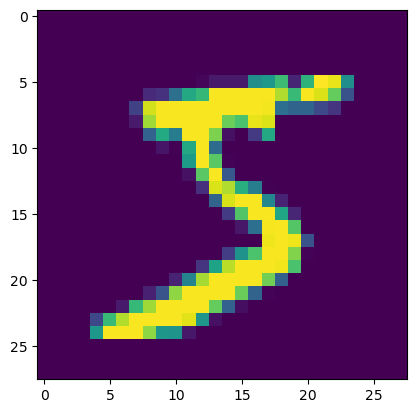

In [61]:
plt.imshow(X_train[0])
plt.show()

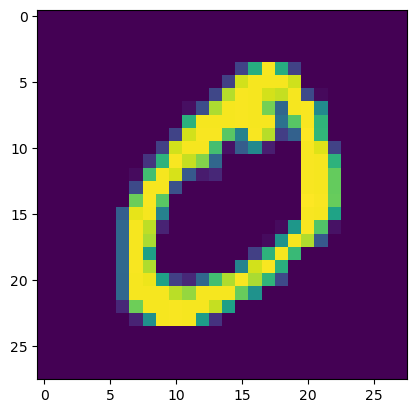

In [62]:
plt.imshow(X_train[1])
plt.show()

In [63]:
Y_train[0]

5

In [64]:
Y_train[1]

0

In [65]:
X_train.shape

(60000, 28, 28)

In [66]:
Y_train.shape

(60000,)

In [67]:
X_test.shape

(10000, 28, 28)

In [68]:
X_train = X_train/ 255.0

In [69]:
X_train.shape

(60000, 28, 28)

In [70]:
X_test = X_test/255.0

In [71]:
import numpy as np 

In [72]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [73]:
X_train.shape

(60000, 784)

In [74]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [75]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [76]:
Y_train = tf.keras.utils.to_categorical (
    Y_train,num_classes = 10 , dtype = 'float32'
 )
Y_test  = tf.keras.utils.to_categorical (
    Y_test,num_classes = 10 , dtype = 'float32'
 )


In [77]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [78]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

In [79]:
model = Sequential()
model.add(Dense(units = 1 , activation = 'sigmoid', input_shape = (784,), name = 'dense'))
model.add(Dense(units = 10 , activation = 'softmax'))

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_4 (Dense)             (None, 10)                20        
                                                                 
Total params: 805 (3.14 KB)
Trainable params: 805 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
 model.compile(optimizer = "SGD", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [82]:
history = model.fit(X_train,Y_train,validation_data = (X_test, Y_test),batch_size = 128 , epochs = 50)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 2.2930 - accuracy: 0.1086 - val_loss: 2.2790 - val_accuracy: 0.1135
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 2.2673 - accuracy: 0.1376 - val_loss: 2.2544 - val_accuracy: 0.1674
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 2.2442 - accuracy: 0.2000 - val_loss: 2.2318 - val_accuracy: 0.2198
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 2.2228 - accuracy: 0.2234 - val_loss: 2.2107 - val_accuracy: 0.2264
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 2.2026 - accuracy: 0.2269 - val_loss: 2.1907 - val_accuracy: 0.2294
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 2.1833 - accuracy: 0.2270 - val_loss: 2.1716 - val_accuracy: 0.2278
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 2.1649 - accuracy: 0.2264 - val_loss: 2.1534 - val_accuracy: 0.2267
Epoch 

In [83]:
from tensorflow.keras.layers import Dropout

In [87]:
model = Sequential()
model.add(Dense(units = 10 , activation = 'relu', input_shape = (784,), name = 'dense'))
model.add(Dense(units = 10 , activation = 'softmax'))
model.add(Dense(units = 10 , activation = 'softmax'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 10, activation = 'softmax'))


In [88]:
 model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [89]:
history1 = model.fit(X_train,Y_train,validation_data = (X_test, Y_test),batch_size = 128 , epochs = 100)

Epoch 1/100
469/469 [==============================] - 5s 6ms/step - loss: 2.1933 - accuracy: 0.2992 - val_loss: 2.0139 - val_accuracy: 0.4686
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 1.8010 - accuracy: 0.3959 - val_loss: 1.5599 - val_accuracy: 0.4805
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 1.5189 - accuracy: 0.4057 - val_loss: 1.3405 - val_accuracy: 0.4848
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 1.3505 - accuracy: 0.4343 - val_loss: 1.1734 - val_accuracy: 0.4837
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 1.2569 - accuracy: 0.4430 - val_loss: 1.1106 - val_accuracy: 0.4811
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1972 - accuracy: 0.4529 - val_loss: 1.0671 - val_accuracy: 0.4888
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 1.1508 - accuracy: 0.4625 - val_loss: 1.0417 - val_accuracy: 0.5018